In [1]:
%load_ext sppl.magics
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%sppl model
X ~=  .525 * norm(loc=-8, scale=2) \
    | .100 * norm(loc=0, scale=2) \
    | .375 * norm(loc=7, scale=3)

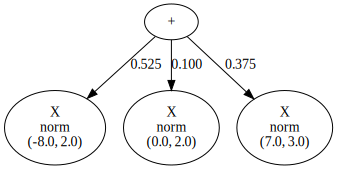

In [3]:
n = %sppl_get_namespace model
%sppl_to_graph model

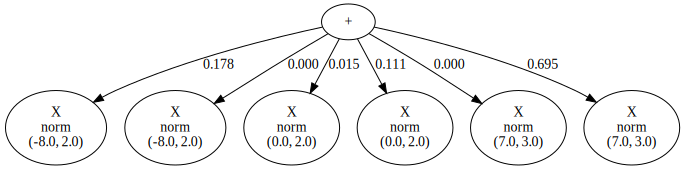

In [4]:
modelc = n.model.condition(((0 < n.X) < 10) | ((-6 < n.X) < -3))
%sppl_to_graph modelc

In [5]:
xs = np.linspace(-17, 17, 500)
pdf_prior = np.asarray([n.model.pdf(n.X << {x}) for x in xs])

In [6]:
pdfs_prior = np.asarray([
    np.exp(w)*np.asarray([c.pdf(n.X << {x}) for x in xs])
    for c, w in zip(n.model.children, n.model.weights)
])

In [7]:
pdfs_post = np.asarray([
    np.exp(w)*np.asarray([c.pdf(n.X << {x}) for x in xs])
    for c, w in zip(modelc.children, modelc.weights)
])

In [8]:
mask0 = np.logical_and(-6<xs, xs<-3)
mask1 = np.logical_and(0<xs, xs<10)

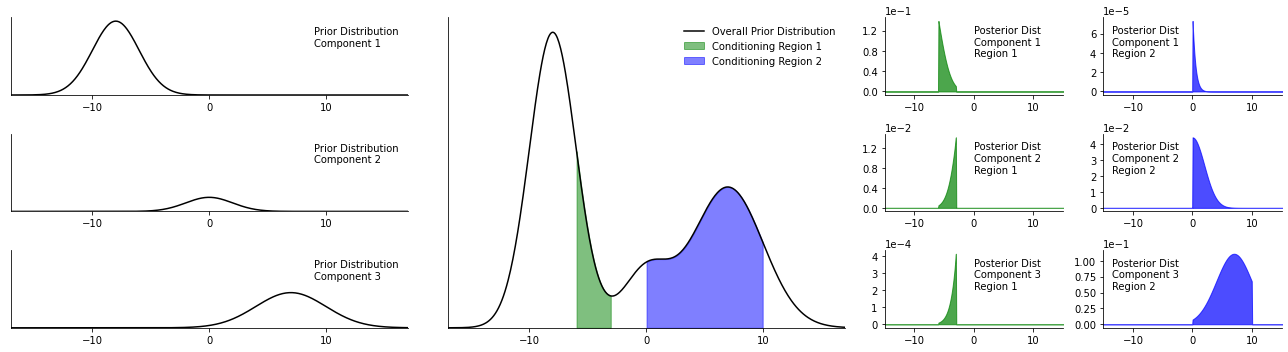

In [9]:
fig = plt.figure()
spec = fig.add_gridspec(ncols=6, nrows=3)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


# CONFIGURE LAYOT
al = fig.add_subplot(spec[:,2:4])
am = [
    fig.add_subplot(spec[0,0:2]),
    fig.add_subplot(spec[1,0:2]),
    fig.add_subplot(spec[2,0:2])
]
ar = [
    fig.add_subplot(spec[0,4]),
    fig.add_subplot(spec[0,5]),
    fig.add_subplot(spec[1,4]),
    fig.add_subplot(spec[1,5]),
    fig.add_subplot(spec[2,4]),
    fig.add_subplot(spec[2,5])
]
axes = [al] + am + ar

# PLOT LEFT
for i, (ax, p) in enumerate(zip(am, pdfs_prior)):
    ax.plot(xs, p, color='k', label='Prior Distribution\nComponent %d' % (i+1,))
    ax.set_xlim([-17, 17])
    ax.set_ylim([0, 0.11])
    ax.set_yticks([])
    ax.legend(loc='upper right', framealpha=0, handlelength=0)
    
# PLOT CENTER
al.plot(xs, pdf_prior, color='k', label='Overall Prior Distribution')
#for l in [-6, -3, 0, 10]:
#    al.vlines(l, 0, n.model.pdf(n.X << {l}), color='k')
al.fill_between(xs[mask0], 0, pdf_prior[mask0], color='g', alpha=.5, label='Conditioning Region 1')
al.fill_between(xs[mask1], 0, pdf_prior[mask1], color='b', alpha=.5, label='Conditioning Region 2')
al.set_xlim([-17, 17])
al.set_ylim([0, 0.11])
al.set_yticks([])
al.legend(loc='upper right', framealpha=0)

# PLOT RIGHT
for i, (ax, p) in enumerate(zip(ar, pdfs_post)):
    color = ['g','b'][i%2]
    ax.fill_between(xs, p, color=color, alpha=0.7)
    ax.set_xlim([-15, 15])
    # ax.set_yticklabels([])
    # ax.set_yticks([])
    component = [1,1,2,2,3,3]
    region = [1,2,1,2,1,2]
    ax.text([.5, .05][(i%2)], .9,
        'Posterior Dist\nComponent %d\nRegion %d' % (component[i], region[i]),
        ha='left',
        va='top',
        transform=ax.transAxes)
    from matplotlib.ticker import FormatStrFormatter
    from matplotlib.ticker import ScalarFormatter
    from matplotlib.ticker import MaxNLocator
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.yaxis.set_major_formatter(ScalarFormatter()) 
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 2))
    
for ax in axes:
    ax.set_xticks(np.arange(-15, 16, 5))
    # ax.set_xlim([-18, 18])
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([-10, 0, 10])

fig.set_tight_layout(True)
fig.set_size_inches(18, 5)